In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import sys

plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [2]:
# bid_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Forex/EURCAD_Candlestick_1_M_BID_01.01.2019-07.11.2020.csv')
# ask_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Forex/EURCAD_Candlestick_1_M_ASK_01.01.2019-07.11.2020.csv')
bid_data = pd.read_csv('dataset/EURCAD_Candlestick_1_M_BID_01.01.2019-07.11.2020.csv')
ask_data = pd.read_csv('dataset/EURCAD_Candlestick_1_M_ASK_01.01.2019-07.11.2020.csv')

bid_data.columns = bid_data.columns + '_bid'
bid_data = bid_data.rename(columns={'Gmt time_bid': 'Gmt time'})

ask_data.columns = ask_data.columns + '_ask'
ask_data = ask_data.rename(columns={'Gmt time_ask': 'Gmt time'})

print(bid_data.shape)
bid_data.head()

(974880, 6)


,Gmt time,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid
0,01.01.2019 00:00:00.000,1.56259,1.56259,1.56259,1.56259,0.0
1,01.01.2019 00:01:00.000,1.56259,1.56259,1.56259,1.56259,0.0
2,01.01.2019 00:02:00.000,1.56259,1.56259,1.56259,1.56259,0.0
3,01.01.2019 00:03:00.000,1.56259,1.56259,1.56259,1.56259,0.0
4,01.01.2019 00:04:00.000,1.56259,1.56259,1.56259,1.56259,0.0


In [3]:
print(ask_data.shape)
ask_data.head()

(974880, 6)


,Gmt time,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask
0,01.01.2019 00:00:00.000,1.56465,1.56465,1.56465,1.56465,0.0
1,01.01.2019 00:01:00.000,1.56465,1.56465,1.56465,1.56465,0.0
2,01.01.2019 00:02:00.000,1.56465,1.56465,1.56465,1.56465,0.0
3,01.01.2019 00:03:00.000,1.56465,1.56465,1.56465,1.56465,0.0
4,01.01.2019 00:04:00.000,1.56465,1.56465,1.56465,1.56465,0.0


In [4]:
def extract_datetime(dtime):
  """
   receives a timestamp and returns 
   day in the week,
   year, month,  
  """
  d, t = dtime.split(' ')
  ds = np.array(d.split('.'), dtype=int)[::-1]
  ts = np.array(t.split(':'), dtype=float)
  date = datetime(ds[0], ds[1], ds[2])

  return date.weekday(), ds[0], ds[1], ds[2], ts[0], ts[1], ts[2]
  
extract_datetime(bid_data['Gmt time'][970000])

(2, 2020, 11, 4, 14.0, 40.0, 0.0)

In [5]:
data = ask_data.join(bid_data.drop('Gmt time', axis=1))
# data = pd.concat([bid_data, ask_data], )
data.head()

,Gmt time,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid
0,01.01.2019 00:00:00.000,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
1,01.01.2019 00:01:00.000,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
2,01.01.2019 00:02:00.000,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
3,01.01.2019 00:03:00.000,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
4,01.01.2019 00:04:00.000,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0


In [6]:
expanded_datetime_columns = ['weekday', 'year', 'month', 'day', 'hour', 'minute', 'second']
expanded_datetime = np.array([extract_datetime(x) for x in data['Gmt time']], dtype=int)


data = data.drop('Gmt time', axis=1,)
data = pd.DataFrame(expanded_datetime, columns=expanded_datetime_columns).join(data)

In [7]:
data

,weekday,year,month,day,hour,minute,second,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid
0,1,2019,1,1,0,0,0,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
1,1,2019,1,1,0,1,0,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
2,1,2019,1,1,0,2,0,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
3,1,2019,1,1,0,3,0,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
4,1,2019,1,1,0,4,0,1.56465,1.56465,1.56465,1.56465,0.0,1.56259,1.56259,1.56259,1.56259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974875,5,2020,11,7,23,55,0,1.55079,1.55079,1.55079,1.55079,0.0,1.54991,1.54991,1.54991,1.54991,0.0
974876,5,2020,11,7,23,56,0,1.55079,1.55079,1.55079,1.55079,0.0,1.54991,1.54991,1.54991,1.54991,0.0
974877,5,2020,11,7,23,57,0,1.55079,1.55079,1.55079,1.55079,0.0,1.54991,1.54991,1.54991,1.54991,0.0
974878,5,2020,11,7,23,58,0,1.55079,1.55079,1.55079,1.55079,0.0,1.54991,1.54991,1.54991,1.54991,0.0


<AxesSubplot:>

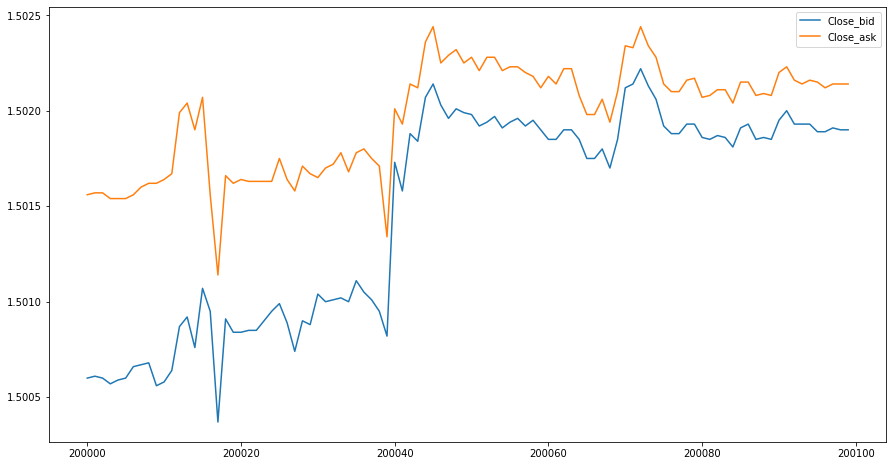

In [8]:
idx_start = 200000
idx_end = 200100

data[['Close_bid', 'Close_ask' ]][idx_start:idx_end].plot(figsize=(15, 8))

<AxesSubplot:>

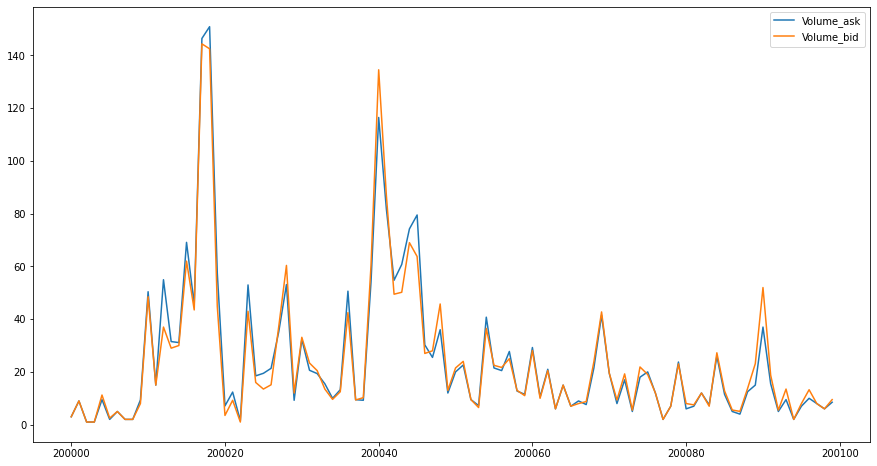

In [9]:
data[['Volume_ask', 'Volume_bid']][idx_start:idx_end].plot(figsize=(15, 8))

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['Open_ask',	'High_ask',	'Low_ask',	'Close_ask',	'Open_bid',	'High_bid',	'Low_bid',
               'Close_bid', 'Volume_ask',	'Volume_bid'], axis=1)
# y = data[['Open_ask',	'High_ask',	'Low_ask',	'Close_ask',	'Open_bid',	'High_bid',	'Low_bid',	'Close_bid']]
y = data['Close_bid']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
print(X_train.shape)
print(y_test.shape)

(731160, 7)
(243720,)


In [11]:
y_train

0         1.56259
1         1.56259
2         1.56259
3         1.56259
4         1.56259
           ...   
731155    1.52534
731156    1.52520
731157    1.52511
731158    1.52513
731159    1.52525
Name: Close_bid, Length: 731160, dtype: float64

In [12]:
cbm10 = y_train.rolling(8).mean()
X_train['cbm'] = cbm10
X_train['cbm'][:10] = X_train['cbm'][10]

<ipython-input-12-712c22f881b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cbm'] = cbm10
<ipython-input-12-712c22f881b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cbm'][:10] = X_train['cbm'][10]
/home/mehran/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/hom

In [15]:
def plot_performance(preds, truth, start, forward=1000):
    if forward == -1:
        end = len(y_preds)
    else:
        end = start + forward

    plt.figure(figsize=(15, 10))
    plt.plot(preds[start: end], label='predicted')
    plt.plot(truth[start: end], label='ground truth')
    plt.legend()

# Baseline Models

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=0, n_estimators=200, loss='exponential', learning_rate=0.5)
regr.fit(X_train, y_train)
regr.score(X_train, y_train)

0.991819547733227

In [ ]:
X_test['cbm'] = np.zeros((y_test.shape[0], 1))
X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,weekday,year,month,day,hour,minute,second,cbm
731160,4,2020,5,22,18,0,0,0.0
731161,4,2020,5,22,18,1,0,0.0
731162,4,2020,5,22,18,2,0,0.0
731163,4,2020,5,22,18,3,0,0.0
731164,4,2020,5,22,18,4,0,0.0
...,...,...,...,...,...,...,...,...
974875,5,2020,11,7,23,55,0,0.0
974876,5,2020,11,7,23,56,0,0.0
974877,5,2020,11,7,23,57,0,0.0
974878,5,2020,11,7,23,58,0,0.0


In [ ]:
item = X_test.iloc[0]
item.iloc[[-1]] = 1
item

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


weekday       4.0
year       2020.0
month         5.0
day          22.0
hour         18.0
minute        0.0
second        0.0
cbm           1.0
Name: 731160, dtype: float64

In [ ]:
def predict(X_test, y_train, verbose=1):
  size = y_train.shape[0]

  y_preds = np.zeros(X_test.shape[0])
  y_preds[0] = np.mean(y_train.values[size-8:])

  for index in range(8):
     item = X_test.iloc[index].values
     item[-1] = (np.sum(y_train.values[size-(8 - index):]) + np.sum(y_preds[:index]))/8
     y_preds[index] = regr.predict(item.reshape(1, -1))

  for index in range(8, X_test.shape[0]):   
    item = X_test.iloc[index].values
    item[-1] = np.mean(y_preds[index-8: index])
    y_preds[index] = regr.predict(item.reshape(1, -1))

    if verbose==1 and index % 100 == 0:
      # print('fwe')
      print("", end='\r{:.2f} has completed'.format((index/y_preds.shape[0])*100))
      # sys.stdout.flush()
  print('')
  return y_preds

In [ ]:
y_preds = predict(X_test, y_train)
y_preds[:10]

99.99 has completed


array([1.52817054, 1.52802546, 1.52778767, 1.52778767, 1.52778767,
       1.52778767, 1.52778767, 1.52778767, 1.52784017, 1.52778767])

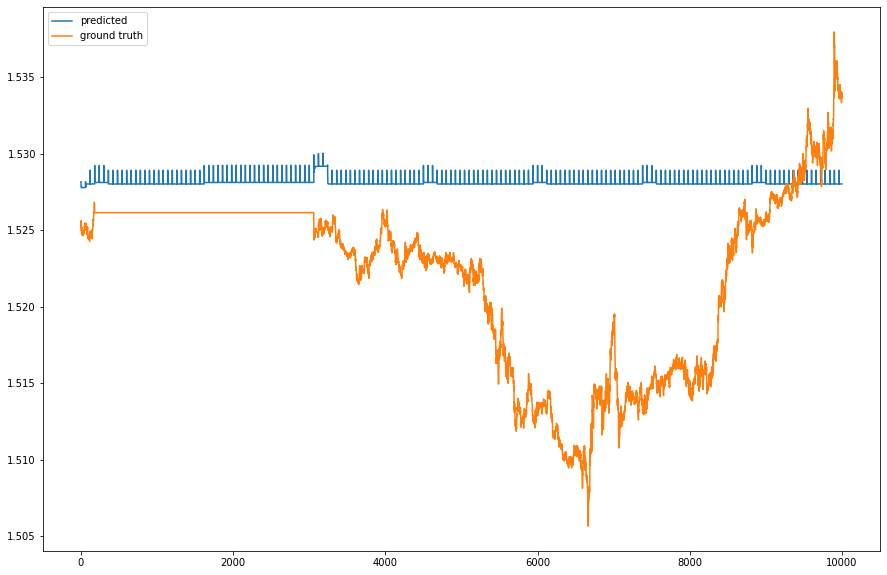

In [ ]:
plot_performance(y_preds, y_test.to_numpy(), 0, forward=10000)

## LSTM

In [25]:
X_train = torch.from_numpy(X_train.values)
y_train = torch.from_numpy(y_train.values)

TypeError: expected np.ndarray (got builtin_function_or_method)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


input_size = 8
seq_length = 1
num_layers = 2
hidden_size = 256
learning_rate = 0.001
num_epochs = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, seq_length, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size * seq_length, 1)
        
    def forward(self, x):
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out
    
    
model = RNN(input_size, hidden_size, seq_length, num_layers)

        

In [42]:
critirion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [43]:
X_train.reshape(X_train.)

tensor([[1.0000e+00, 2.0190e+03, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.5626e+00],
        [1.0000e+00, 2.0190e+03, 1.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         1.5626e+00],
        [1.0000e+00, 2.0190e+03, 1.0000e+00,  ..., 2.0000e+00, 0.0000e+00,
         1.5626e+00],
        ...,
        [4.0000e+00, 2.0200e+03, 5.0000e+00,  ..., 5.7000e+01, 0.0000e+00,
         1.5254e+00],
        [4.0000e+00, 2.0200e+03, 5.0000e+00,  ..., 5.8000e+01, 0.0000e+00,
         1.5254e+00],
        [4.0000e+00, 2.0200e+03, 5.0000e+00,  ..., 5.9000e+01, 0.0000e+00,
         1.5253e+00]], dtype=torch.float64)

In [40]:
for epoch in range(num_epochs):
    
    scores = model(X_train)
    loss = critirion(scores, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    

        weekday  year  month  day  hour  minute  second
0             1  2019      1    1     0       0       0
1             1  2019      1    1     0       1       0
2             1  2019      1    1     0       2       0
3             1  2019      1    1     0       3       0
4             1  2019      1    1     0       4       0
...         ...   ...    ...  ...   ...     ...     ...
974875        5  2020     11    7    23      55       0
974876        5  2020     11    7    23      56       0
974877        5  2020     11    7    23      57       0
974878        5  2020     11    7    23      58       0
974879        5  2020     11    7    23      59       0

[974880 rows x 7 columns]


RuntimeError: input must have 3 dimensions, got 2